In [202]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as kpss
import warnings
warnings.filterwarnings("ignore")

# Считываем ряд с подневными оборотам в магазине

In [203]:
df = pd.read_csv('spending_by_day.csv')
df['data'] = df.data.apply(lambda x: x[0:10])
df['data'] = pd.to_datetime(df.data, errors='coerce')
df.set_index('data', inplace=True)
df.head()

,sum
data,
2018-01-01,1.897892e+06
2018-01-02,5.438664e+06
2018-01-03,5.628547e+06
2018-01-04,6.056366e+06
2018-01-05,6.064084e+06


<AxesSubplot:xlabel='data'>

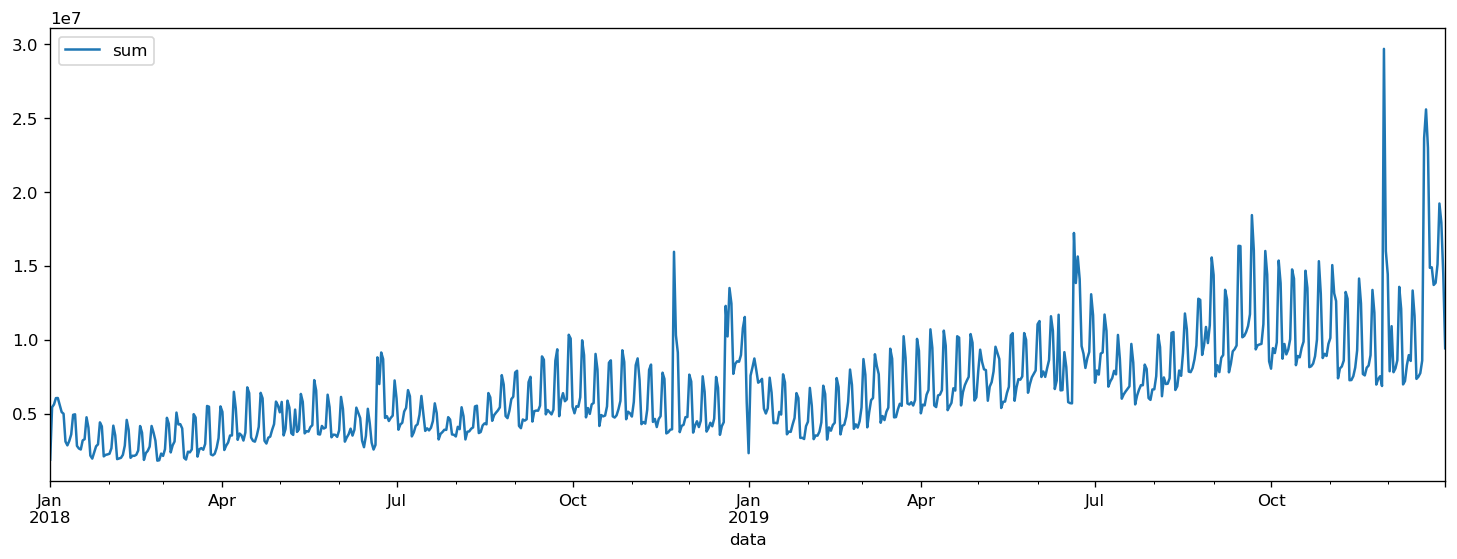

In [204]:
df.plot(figsize=(15,5))

# Посмотрим на Автокорреляцию и частичную автокорреляцию

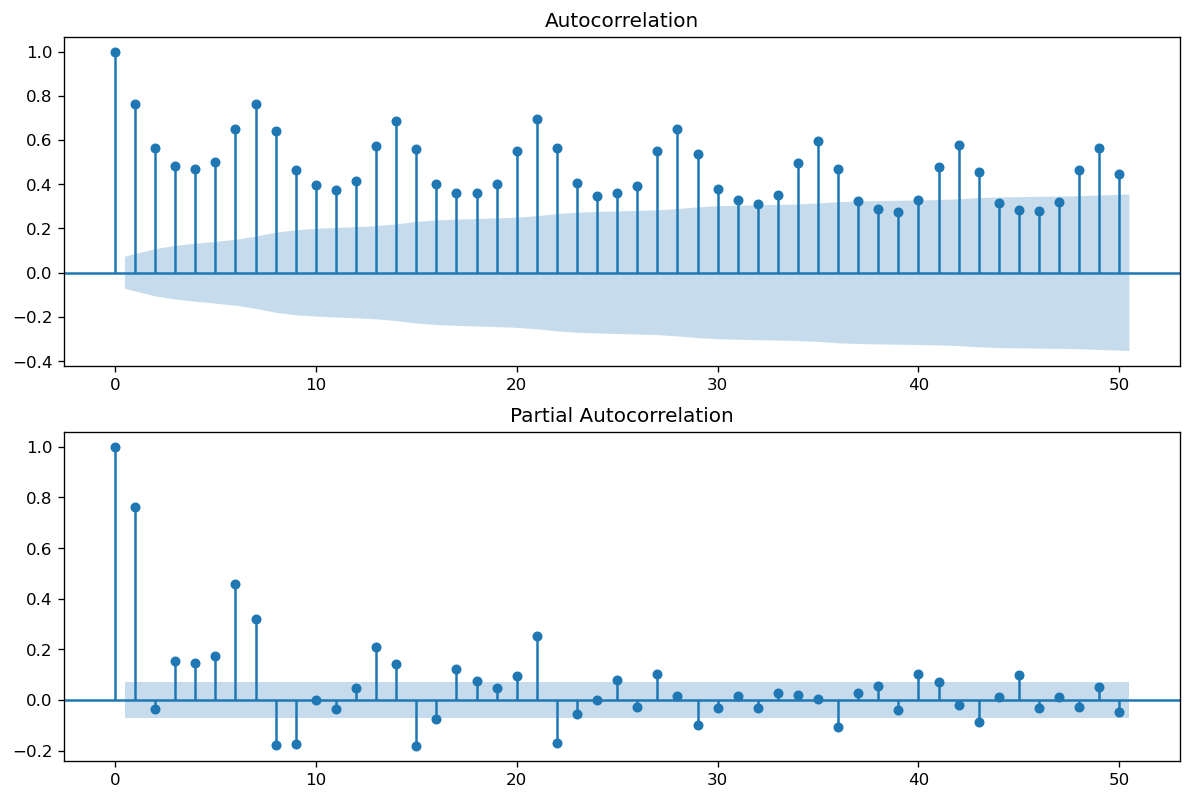

In [205]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=50, ax=ax2)

# Обучаем модели ARIMA и SARIMAX

In [206]:
src_data_model = df[:'2019-12-01']
src_data_model
model_arima = sm.tsa.ARIMA(src_data_model, order=(6, 1, 3)).fit(full_output=False, disp=0)

model_sarima = sm.tsa.SARIMAX(src_data_model, order=(6, 1, 6), seasonal_order=(5, 1, 6, 7)).fit(full_output=False, disp=0)

In [207]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               sum   No. Observations:                  700
Model:             SARIMAX(6, 1, 6)x(5, 1, 6, 7)   Log Likelihood              -10791.041
Date:                           Wed, 22 Dec 2021   AIC                          21630.082
Time:                                   22:01:00   BIC                          21739.032
Sample:                               01-01-2018   HQIC                         21672.220
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9151      0.333     -2.746      0.006      -1.568      -0.262
ar.L2         -0.4419      0.484     -0.913      0.361      -1.390       0.506
ar.L3         -0.0783      0.439     -0.178      0.859      -0.939       0.783
ar.L4          0.4858      0.340      1.427      0.154      -0.181       1.153
ar.L5          0.6992      0.122      5.744      0.000       0.461       0.938
ar.L6          0.0228      0.253      0.090      0.928      -0.474       0.519
ma.L1          0.3182      0.343      0.928      0.353      -0.354       0.990
ma.L2         -0.2374      0.318     -0.746      0.456      -0.861       0.387
ma.L3         -0.3701      0.167     -2.214      0.027      -0.698      -0.043
ma.L4         -0.6643      0.130     -5.106      0.000      -0.919      -0.409
ma.L5         -0.5113      0.309     -1.653      0.098      -1.118       0.095
ma.L6          0.4772      0.392      1.218      0.223      -0.291       1.245
ar.S.L7       -0.6748      1.439     -0.469      0.639      -3.495       2.145
ar.S.L14      -0.2807      1.757     -0.160      0.873      -3.725       3.163
ar.S.L21      -0.1039      1.716     -0.061      0.952      -3.467       3.260
ar.S.L28       0.1806      0.977      0.185      0.853      -1.735       2.096
ar.S.L35       0.4785      0.674      0.710      0.478      -0.843       1.800
ma.S.L7       -0.0885      1.437     -0.062      0.951      -2.905       2.728
ma.S.L14      -0.2290      1.420     -0.161      0.872      -3.012       2.554
ma.S.L21      -0.2253      1.255     -0.179      0.858      -2.686       2.235
ma.S.L28      -0.2960      0.960     -0.308      0.758      -2.178       1.586
ma.S.L35      -0.3352      0.747     -0.449      0.654      -1.799       1.129
ma.S.L42       0.3664      0.626      0.585      0.558      -0.861       1.593
sigma2      2.746e+12   1.68e-11   1.64e+23      0.000    2.75e+12    2.75e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            213753.25
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               5.20   Skew:                             6.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        88.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.49e+38. Standard errors may be unstable.
"""

# Делаем предсказания

In [209]:
pred_arima = model_arima.predict('2019-12-01','2020-02-01', typ='levels')
pred_sarima = model_sarima.predict('2019-12-01','2020-02-01', typ='levels')

<AxesSubplot:xlabel='data'>

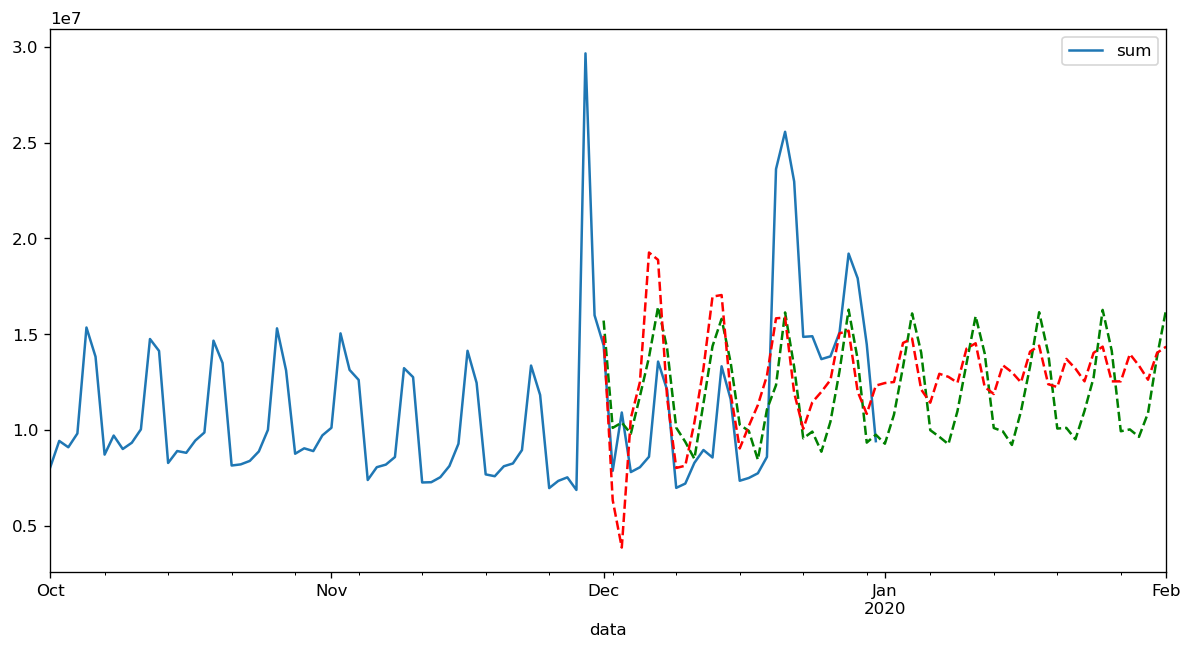

In [210]:
#df.plot(figsize=(12,6))
df['2019-10-01':].plot(figsize=(12,6))
pred_sarima.plot(style='g--')
pred_arima.plot(style='r--')

# Домашнее задание

Работаю с данными

<AxesSubplot:xlabel='data'>

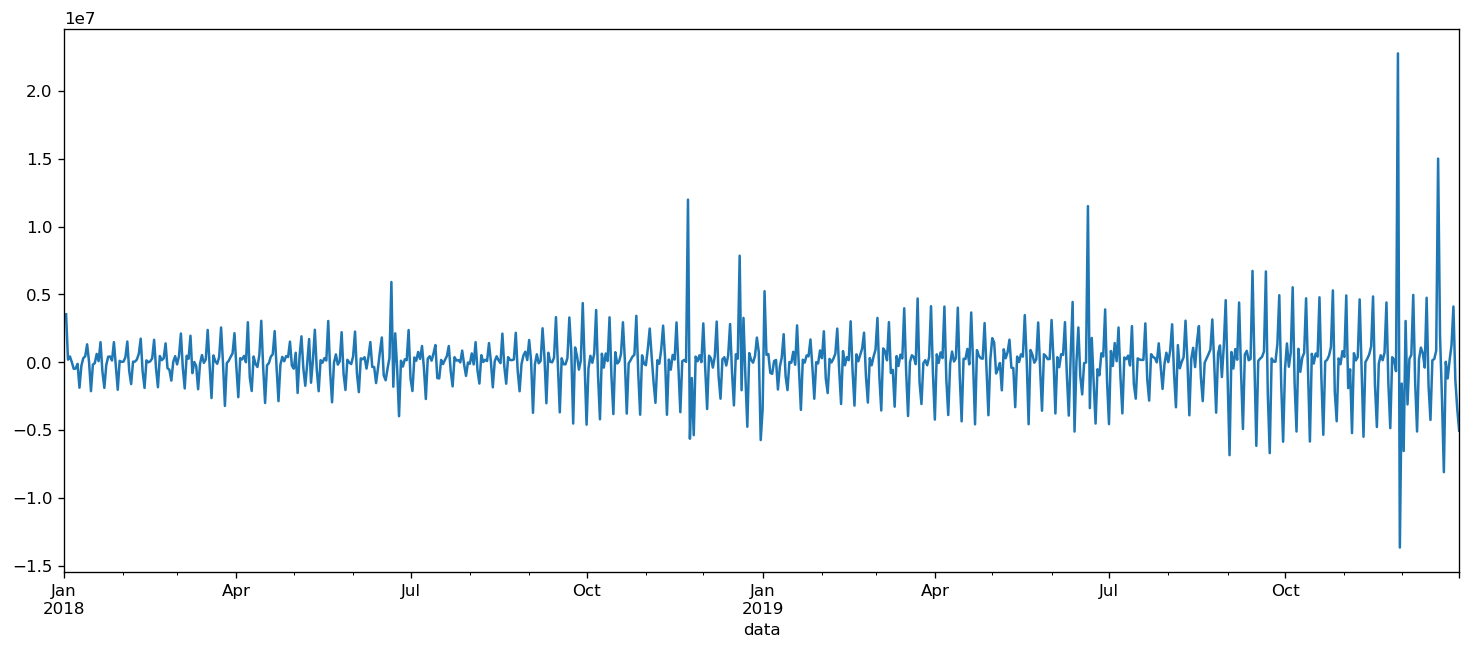

In [211]:
df = pd.read_csv('spending_by_day.csv')
df['data'] = df.data.apply(lambda x: x[0:10])
df['data'] = pd.to_datetime(df.data, errors='coerce')
df.set_index('data', inplace=True)

df['sum_diff_1'] = df['sum'] - df['sum'].shift(1)
df['sum_diff_1'].plot(figsize=(15,6))

In [217]:
print('p_value', sm.tsa.stattools.kpss(df['sum'], regression='c')[1])
print('p_value', sm.tsa.stattools.kpss(df['sum_diff_1'].dropna(), regression='c')[1])

p_value 0.01
p_value 0.1


Как видно, уже после первого дифференцирования, ряд стал стационарен по kpss

Но пока попробуем взять d=2

<AxesSubplot:xlabel='data'>

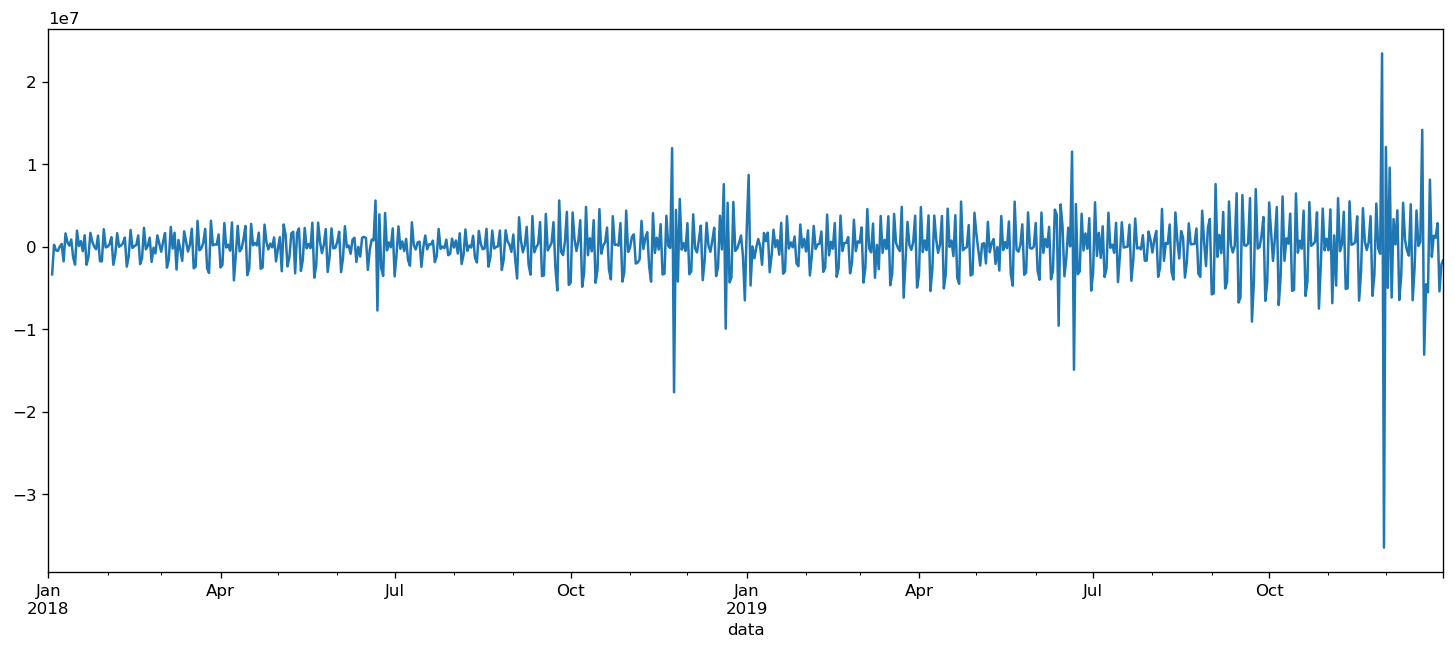

In [220]:
df['sum_diff_2'] = df['sum_diff_1'] - df['sum_diff_1'].shift(1)
df['sum_diff_2'].plot(figsize=(15,6))

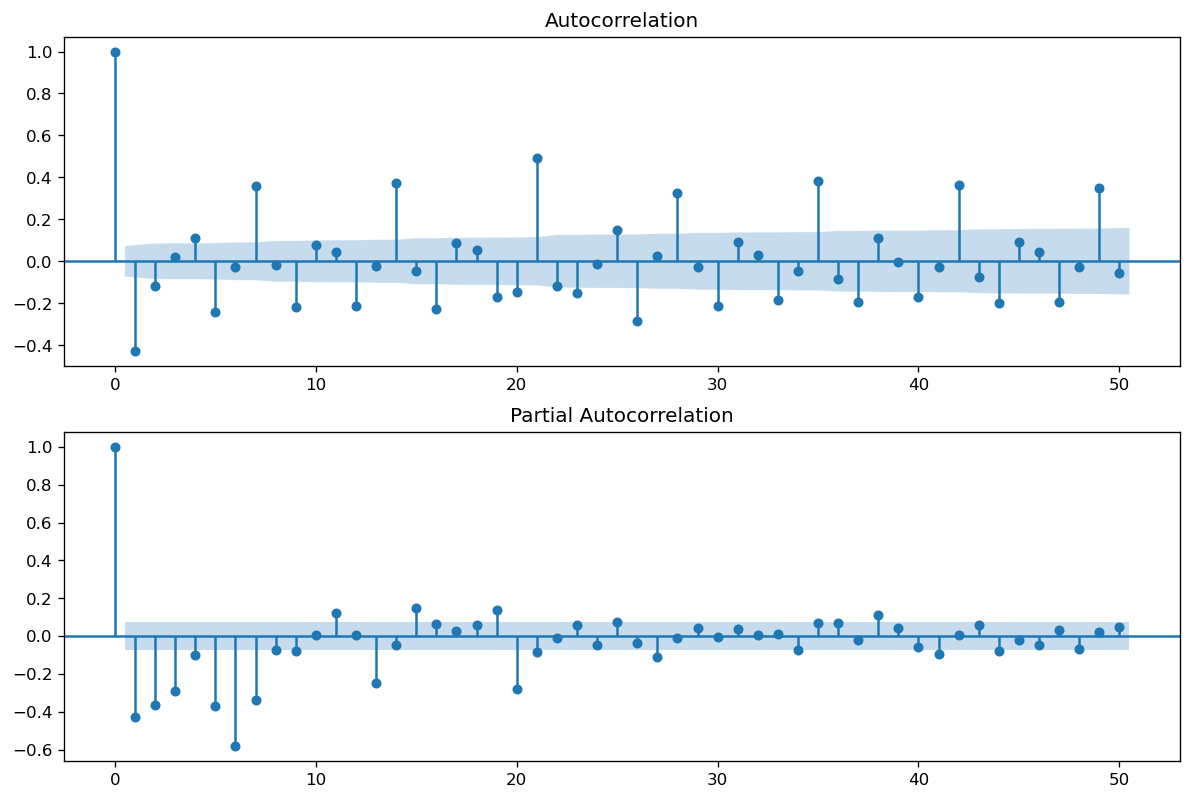

In [221]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['sum_diff_2'].dropna().values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['sum_diff_2'].dropna(), lags=50, ax=ax2)

Определите какие d и D надо взять

D = 2

d = 1

Подберите наулучшую модель из класса ARIMA

In [245]:
src_data_model = df['sum'][:'2019-12-01']

model_arima = sm.tsa.ARIMA(src_data_model, order=(6, 1, 6)).fit(full_output=False, disp=0)
model_sarima = sm.tsa.SARIMAX(src_data_model, order=(5, 1, 6), seasonal_order=(5, 2, 6, 7)).fit(full_output=False, disp=0)

In [246]:
pred_arima = model_arima.predict('2019-12-01','2020-01-01', typ='levels')
pred_sarima = model_sarima.predict('2019-12-01','2020-01-01', typ='levels')

<AxesSubplot:xlabel='data'>

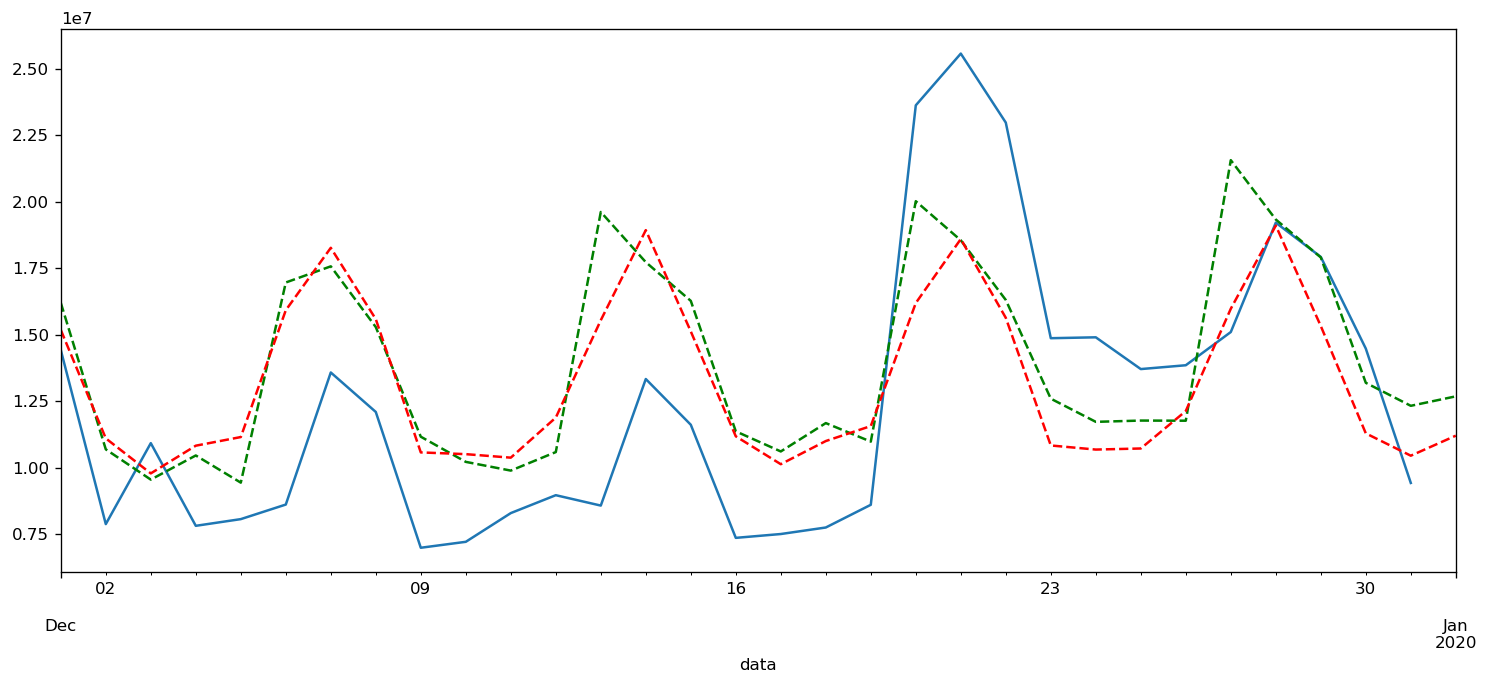

In [247]:
#df.plot(figsize=(12,6))
df['2019-12-01':]['sum'].plot(figsize=(15,6))
pred_sarima.plot(style='g--')
pred_arima.plot(style='r--')

Посмотрите на получившиеся ошибки. Что вы думаете о них.

In [248]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               sum   No. Observations:                  700
Model:             SARIMAX(5, 1, 6)x(5, 2, 6, 7)   Log Likelihood              -10904.910
Date:                           Wed, 22 Dec 2021   AIC                          21855.820
Time:                                   22:28:10   BIC                          21959.997
Sample:                               01-01-2018   HQIC                         21896.131
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1134      1.134     -0.100      0.920      -2.336       2.109
ar.L2         -0.7196      0.849     -0.848      0.397      -2.383       0.944
ar.L3         -0.1275      1.085     -0.117      0.906      -2.254       1.999
ar.L4         -0.7096      0.758     -0.936      0.349      -2.196       0.777
ar.L5          0.3468      1.212      0.286      0.775      -2.029       2.722
ma.L1         -0.4858      1.142     -0.425      0.671      -2.725       1.753
ma.L2          0.5803      0.787      0.738      0.461      -0.962       2.122
ma.L3         -0.3456      1.001     -0.345      0.730      -2.307       1.616
ma.L4          0.5335      0.884      0.604      0.546      -1.199       2.266
ma.L5         -0.8132      1.051     -0.774      0.439      -2.874       1.247
ma.L6          0.0773      0.892      0.087      0.931      -1.672       1.826
ar.S.L7       -1.3721      8.181     -0.168      0.867     -17.407      14.663
ar.S.L14      -1.3268     14.328     -0.093      0.926     -29.410      26.756
ar.S.L21      -0.8807     14.295     -0.062      0.951     -28.899      27.138
ar.S.L28      -0.5720      7.886     -0.073      0.942     -16.029      14.885
ar.S.L35      -0.0548      0.487     -0.113      0.910      -1.009       0.899
ma.S.L7       -0.3318      8.194     -0.040      0.968     -16.392      15.729
ma.S.L14      -0.2350     10.075     -0.023      0.981     -19.982      19.512
ma.S.L21      -0.3918      9.427     -0.042      0.967     -18.868      18.084
ma.S.L28       0.0578      9.413      0.006      0.995     -18.391      18.507
ma.S.L35      -0.2962      6.758     -0.044      0.965     -13.541      12.949
ma.S.L42       0.3296      5.255      0.063      0.950      -9.970      10.630
sigma2      8.012e+12   2.01e-10   3.99e+22      0.000    8.01e+12    8.01e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            175833.99
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               5.77   Skew:                             6.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        80.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.36e+38. Standard errors may be unstable.
"""

#Ваше мнение о получившейся модели и остатках P.S. Переделайте параграф в marckdown

На текущий момент модель работает даже хуже, чем ее "рандомная" реализация

# Тут я играюсь с другими методами питона

Дальше ДЗ нет:)

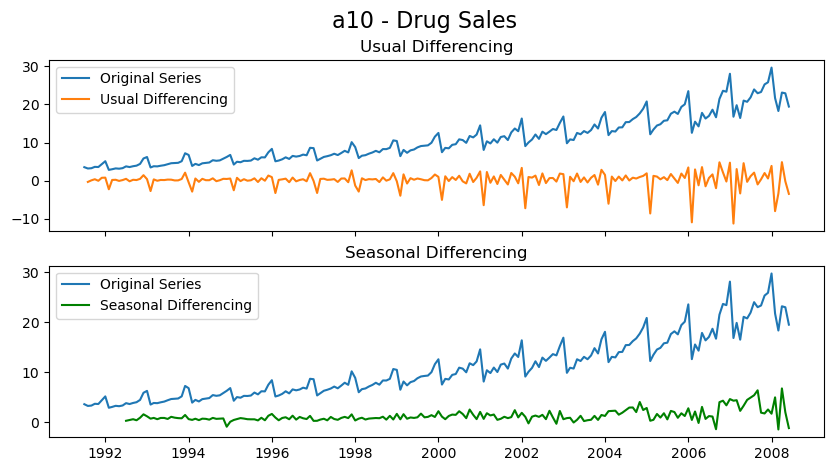

In [260]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [261]:
data[:].diff(1)

,value
date,
1991-07-01,NaN
1991-08-01,-0.345700
1991-09-01,0.071330
1991-10-01,0.358782
1991-11-01,-0.045134
...,...
2008-02-01,-8.011071
2008-03-01,-3.389340
2008-04-01,4.842732


In [255]:
data = pd.read_csv('spending_by_day.csv')